# Stock Price Prediction with Artificial Neural Networks

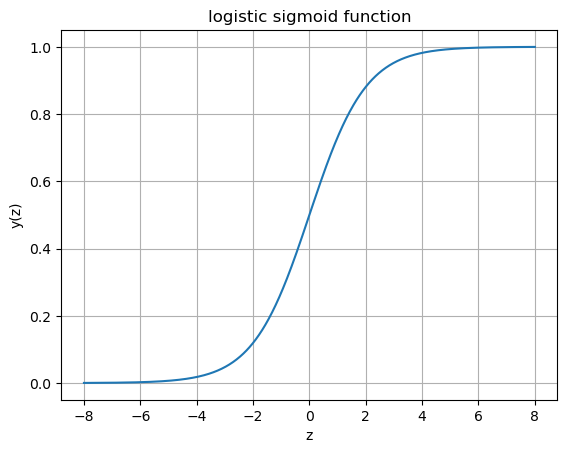

In [18]:
import numpy as np 
import matplotlib.pyplot as plt
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))
z = np.linspace(-8,  8, 1000)
y = sigmoid(z)
plt.plot(z, y)
plt.xlabel('z')
plt.ylabel('y(z)')
plt.title('logistic sigmoid function')
plt.grid()
plt.show()

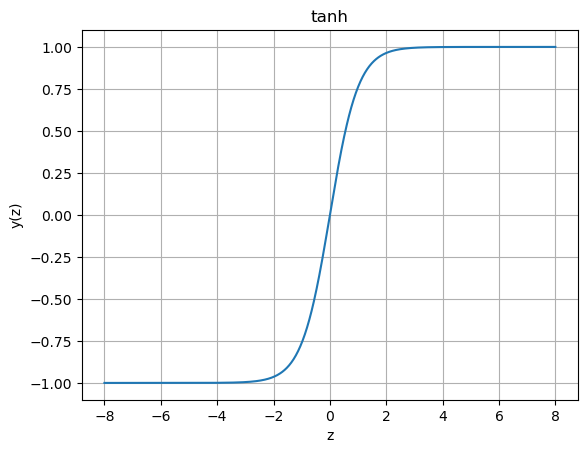

In [19]:
def tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

z = np.linspace(-8, 8, 1000)
y = tanh(z)
plt.plot(z, y)
plt.xlabel('z')
plt.ylabel('y(z)')
plt.title('tanh')
plt.grid()
plt.show()



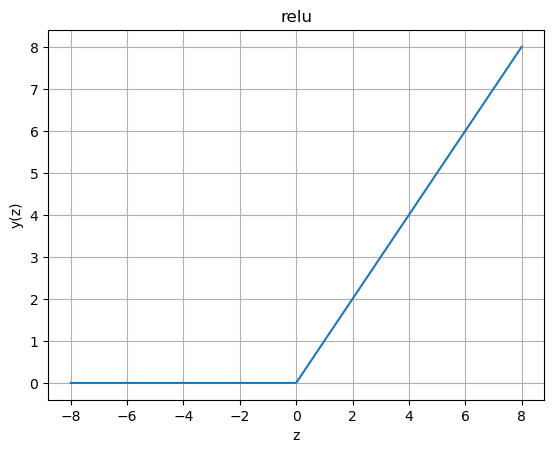

In [20]:
def relu(z):
    return np.maximum(np.zeros_like(z), z)
z = np.linspace(-8, 8, 1000) 
y = relu(z)
plt.plot(z, y)
plt.xlabel('z')
plt.ylabel('y(z)')
plt.title('relu')
plt.grid()
plt.show()


# Building Neural Networks

In [21]:
def sigmoid_derivative(z):
    return sigmoid(z) * (1.0 - sigmoid(z))

In [35]:
def train(X, y, n_hidden, learning_rate, n_iter):
    m, n_input = X.shape
    W1 = np.random.randn(n_input, n_hidden)
    b1 = np.zeros((1, n_hidden))
    W2 = np.random.randn(n_hidden, 1)
    b2 = np.zeros((1, 1))
    for i in range(1, n_iter+1):
        Z2 = np.matmul(X, W1) + b1
        A2 = sigmoid(Z2)
        Z3 = np.matmul(A2, W2) + b2
        A3 =  Z3

        dZ3 = A3 - y
        dW2 = np.matmul(A2.T, dZ3)
        db2 = np.sum(dZ3, axis=0, keepdims=True)
        dZ2  = np.matmul(dZ3, W2.T) * sigmoid_derivative(Z2)
        dW1 = np.matmul(X.T, dZ2)
        db1 = np.sum(dZ2, axis=0)

        W2 = W2 - learning_rate * dW2 / m
        b2 = b2 - learning_rate * db2 / m 
        W1 = W1 - learning_rate * dW1 / m 
        b1 = b1 - learning_rate * db1 / m

        if i % 100 == 0:
            cost = np.mean((y - A3) ** 2)
            print('Iteration %i, training loss: %f' % (i, cost)) 
    model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model

In [36]:
from sklearn import datasets
housing = datasets.fetch_california_housing()
num_test = 10  # The last 10 samples as the testing set 
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler()
X_train = housing.data[:-num_test, :]
X_train = scaler.fit_transform(X_train)
y_train = housing.target[:-num_test].reshape(-1, 1)
X_test = housing.data[-num_test:, :]
X_test = scaler.transform(X_test)
y_test = housing.target[-num_test:]


In [37]:
n_hidden = 20
learning_rate = 0.1
n_iter = 2000

model = train(X_train, y_train, n_hidden, learning_rate, n_iter)




Iteration 100, training loss: 0.641102
Iteration 200, training loss: 0.561639
Iteration 300, training loss: 0.523784
Iteration 400, training loss: 0.502954
Iteration 500, training loss: 0.489680
Iteration 600, training loss: 0.480120
Iteration 700, training loss: 0.472592
Iteration 800, training loss: 0.466292
Iteration 900, training loss: 0.460813
Iteration 1000, training loss: 0.455954
Iteration 1100, training loss: 0.451614
Iteration 1200, training loss: 0.447688
Iteration 1300, training loss: 0.444079
Iteration 1400, training loss: 0.440730
Iteration 1500, training loss: 0.437610
Iteration 1600, training loss: 0.434694
Iteration 1700, training loss: 0.431960
Iteration 1800, training loss: 0.429387
Iteration 1900, training loss: 0.426956
Iteration 2000, training loss: 0.424656


In [41]:
def predict(X, model):
    W1 = model['W1']
    b1 = model['b1']
    W2 = model['W2']
    b2 = model['b2']
    A2 = sigmoid(np.matmul(X, W1) + b1)
    A3 = np.matmul(A2, W2) + b2 
    return A3

In [42]:
predictions = predict(X_test, model)

In [44]:
print(predictions[:, 0])

[1.15868676 1.13966356 0.97298355 0.79526241 1.1372995  0.3154428
 0.6261987  0.40912311 0.56584145 0.6651861 ]


In [45]:
print(y_test)

[1.12  1.072 1.156 0.983 1.168 0.781 0.771 0.923 0.847 0.894]


## Implementing Neural Networks with scikit-learn

In [47]:
from sklearn.neural_network import MLPRegressor
nm_scikit = MLPRegressor(hidden_layer_sizes=(16, 8),
                        activation='relu',
                        solver='adam',
                        learning_rate_init=0.001,
                        random_state=42,
                        max_iter=2000)

In [48]:
nm_scikit.fit(X_train, y_train.ravel())
predictions = nm_scikit.predict(X_test)
print(predictions)

[1.19968791 1.2725324  1.30448323 0.88688675 1.18623612 0.72605956
 0.87409406 0.85671201 0.93423154 0.94196305]


In [49]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, predictions))

0.010613171947751705


## Implementing Neural Networks with Tensorflow

In [50]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)

In [51]:
model = keras.Sequential([
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=8, activation='relu'),
    keras.layers.Dense(units=1)
])

In [56]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.01))

In [57]:
model.fit(X_train, y_train, epochs=300)

Epoch 1/300
645/645 [==============================] - 1s 610us/step - loss: 0.5552
Epoch 2/300
645/645 [==============================] - 0s 595us/step - loss: 0.4020
Epoch 3/300
645/645 [==============================] - 0s 593us/step - loss: 0.3745
Epoch 4/300
645/645 [==============================] - 0s 586us/step - loss: 0.3640
Epoch 5/300
645/645 [==============================] - 0s 592us/step - loss: 0.3398
Epoch 6/300
645/645 [==============================] - 0s 584us/step - loss: 0.3309
Epoch 7/300
645/645 [==============================] - 0s 605us/step - loss: 0.3268
Epoch 8/300
645/645 [==============================] - 0s 591us/step - loss: 0.3241
Epoch 9/300
645/645 [==============================] - 0s 585us/step - loss: 0.3239
Epoch 10/300
645/645 [==============================] - 0s 590us/step - loss: 0.3238
Epoch 11/300
645/645 [==============================] - 0s 584us/step - loss: 0.3163
Epoch 12/300
645/645 [==============================] - 0s 593us/step - lo

In [58]:
predictions = model.predict(X_test)[:,0]
print(predictions)

1/1 [==============================] - 0s 60ms/step
[1.3028855  1.2955295  1.2424009  0.95866454 1.2829664  0.7602792
 0.80456114 0.8489948  0.9086221  1.0249469 ]


In [59]:
print(mean_squared_error(y_test, predictions))

0.013266399638122145


# Implementing Neural Networks with PyTorch

In [61]:
import torch
import torch.nn as nn
torch.manual_seed(42)

### Create a torch.nn sequential model (pass a list of layer instances to the constructor incl. 2 fully connected hidden layers
### with 16 nodes and 8 nodes respectively. ReLU activation is used in each fully connected layer)

In [62]:
model = nn.Sequential(nn.Linear(X_train.shape[1], 16),
                      nn.ReLU(),
                      nn.Linear(16, 8),
                      nn.ReLU(),
                      nn.Linear(8, 1))

In [64]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [65]:
X_train_torch = torch.from_numpy(X_train.astype(np.float32))
y_train_torch = torch.from_numpy(y_train.astype(np.float32))

In [66]:
def train_step(model, X_train, y_train, loss_function, optimizer):
    pred_train = model(X_train)
    loss = loss_function(pred_train, y_train)

    model.zero_grad()
    loss.backward()
    optimizer.step()
    return loss.item()

#### fit the model with 500 iterations, in every 100 iterations the training loss (MSE) is displayed:

In [67]:
for epoch in range(500):
    loss = train_step(model, X_train_torch, y_train_torch, loss_function, optimizer)
    if epoch % 100 == 0:
        print(f"Epoch {epoch} - loss: {loss}")

Epoch 0 - loss: 4.908532619476318
Epoch 100 - loss: 0.500281572341919
Epoch 200 - loss: 0.4082052409648895
Epoch 300 - loss: 0.38706356287002563
Epoch 400 - loss: 0.3721480965614319


#### Use the trained model to predict testing cases and print the predictions and their Mean Squared Error(MSE): 

In [68]:
X_test_torch = torch.from_numpy(X_test.astype(np.float32))
predictions = model(X_test_torch).detach().numpy()[:, 0]
print(predictions)

[1.172354   1.1307554  1.1062286  0.86255383 1.0916342  0.6731943
 0.88883716 0.8031712  0.85539573 0.87670153]


### Picking the right activation functions:

#### **Linear: f(z) = z**. No activation function. Usually used in output layer of regression networks as no transformation are needed in the outputs.
#### **Sigmoid(logistic)**: Transforms output layer to a range between 0 and 1. Think of as a probabiliy of an output prediction. Usually used in output layers
#### of binary classification networks.  Note that the NN may get stuck at a suboptimal solution because the sigmoid function is monotonic.
#### **Softmax**: A generalized logistic function used  for multiclass classification. Used in the output layer in multiclass classification networks.
#### **Tanh**: Better version of sigmoid function w stronger gradients. The derivatives are steeper than those for the sigmoid function. Range from -1 to 1,
####   Commmon to use tanh function in hidden layers.
#### **ReLU**: Arguably most frequently used activation function currently. 
#### Often used in hidden layers in feedforward networks. Range from 0 to infinity.
#### The function and its derivative are both monotonic. Benefits over tanh include; sparsity(only a subset of neurons are activated at any given time),
#### which can reduce the computational training and inference costs since fewer neurons need to be computed. 
#### ReLU also mitigates the vanishing gradient problem, which occurs when gradients become very small during backpropagation, 
#### leading to stalled or slower learning.
#### ReLU does not saturate for positive inputs, allowing gradients to flow more freely during training.
### One drawback to ReLU is the inability to appropriately map the negative part of the input where all negative inputs are transformed to 0.
### *Leaky ReLU*, introduces a small slope in the negative part. When z < 0, f(z) = az, where a is usually a small value(e.g. 0.01)

## Dropout

In [69]:
model_with_dropout = nn.Sequential(nn.Linear(X_train.shape[1],  16),
                                   nn.ReLU(),
                                   nn.Dropout(0.1),
                                   nn.Linear(16, 8),
                                   nn.ReLU(),
                                   nn.Linear(8, 1))

In [70]:
optimizer = torch.optim.Adam(model_with_dropout.parameters(), lr = 0.01)

In [74]:
for epoch in range(1000):
    loss = train_step(model_with_dropout, X_train_torch, y_train_torch, loss_function, optimizer)
    if epoch % 100 == 0:
        print(f"Epoch {epoch} - loss: {loss}")


Epoch 0 - loss: 0.3548091948032379
Epoch 100 - loss: 0.35157671570777893
Epoch 200 - loss: 0.34769171476364136
Epoch 300 - loss: 0.3367944657802582
Epoch 400 - loss: 0.3271506130695343
Epoch 500 - loss: 0.32561182975769043
Epoch 600 - loss: 0.32344937324523926
Epoch 700 - loss: 0.3205565810203552
Epoch 800 - loss: 0.31654655933380127
Epoch 900 - loss: 0.3177076578140259


In [75]:
model_with_dropout.eval()
predictions = model_with_dropout (X_test_torch).detach().numpy()[:, 0]
print(mean_squared_error(y_test, predictions))

0.01437505433184422


## Early Stopping 

In [78]:
model = nn.Sequential(nn.Linear(X_train.shape[1],  16),
                       nn.ReLU(),
                       nn.Linear(16, 8),
                       nn.ReLU(),
                       nn.Linear(8, 1))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [79]:
patience  = 100
epochs_no_improve = 0
best_test_loss = float('inf')

In [81]:
import copy
best_model = model
for epoch in range(500):
    loss = train_step(model, X_train_torch, y_train_torch, loss_function, optimizer)
    predictions = model(X_test_torch).detach().numpy()[:, 0]
    test_loss = mean_squared_error(y_test, predictions)
    if test_loss > best_test_loss:
        epochs_no_improve += 1
        if epochs_no_improve > patience:
            print(f"Early stopped at epoch {epoch}")
            break
    else:
        epochs_no_improve =  0
        best_test_loss = test_loss
        best_model = copy.deepcopy(model)
    

Early stopped at epoch 195


In [82]:
predictions = best_model(X_test_torch).detach().numpy()[:, 0]
print(mean_squared_error(y_test, predictions))

0.0058505544663254765
